In [1]:
# https://yunwoong.tistory.com/92
#!pip install imutils

import matplotlib.pyplot as plt
import imutils # OpenCV가 제공하는 기능 중에 좀 복잡하고 사용성이 떨어지는 부분을 잘 보완해 주는 패키지
import cv2
import os

In [8]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
cascades_path = 'haarcascade'
 
detectorPaths = {
    "face": "haarcascade_frontalface_default.xml",
    "eyes": "haarcascade_eye.xml",
}

detectors = {}
    
for (name, path) in detectorPaths.items():
    path = os.path.sep.join([cascades_path, path])
    detectors[name] = cv2.CascadeClassifier(path)

In [9]:
# load image

image_path = 'images/Emmanuel_Macron_in_2019.jpg'
#image_path = 'images/cats.jpg'
 
image = cv2.imread(image_path)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
# 5. Face Detection

faceRects = detectors["face"].detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

In [12]:
for (fX, fY, fW, fH) in faceRects:
    # 얼굴 ROI 추출
    faceROI = gray[fY:fY+ fH, fX:fX + fW]
    # 눈 ROI 추출
    eyeRects = detectors["eyes"].detectMultiScale(faceROI, scaleFactor=1.1, minNeighbors=10, minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
    
    # 눈 bounding box
    for (eX, eY, eW, eH) in eyeRects:
        # draw the eye bounding box
        ptA = (fX + eX, fY + eY)
        ptB = (fX + eX + eW, fY + eY + eH)
        cv2.rectangle(image, ptA, ptB, (0, 0, 255), 2)
        
    # 얼굴 bounding box
    cv2.rectangle(image, (fX, fY), (fX + fW, fY + fH), (0, 255, 0), 2)

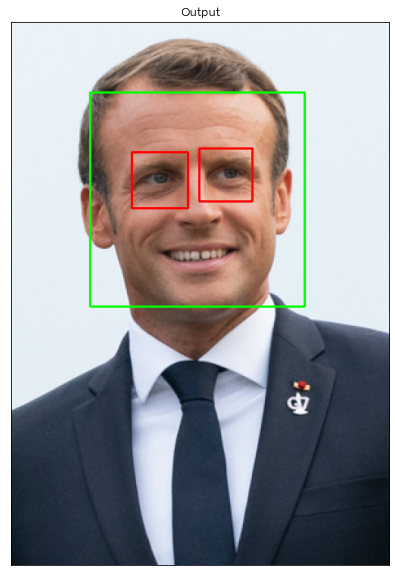

In [13]:
plt_imshow("Output", image, figsize=(16,10))